In [ ]:
%pylab inline

In [ ]:
import numpy as np
import pandas as pd
import scipy
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (16,10)

In [ ]:
# my data
X = np.array([1.34, 2.43, 2.9, 3.37, 3.56, 4.1, 5.37, 6.23, 7.07, 7.63, 9.06, 9.84, 9.96, 12.14, 12.83, 13.21, 13.2],dtype=np.float64)
Y = np.array([13.4, 8.24, 5.97, 4.58, 4.72, 3.33, 1.77, 1.04, 0.69, 0.52, 0.27, 0.17, 0.17, 0.06, 0.04, 0.03, 0.03], dtype=np.float64)

In [ ]:
plt.plot(X, Y)

In [ ]:
plt.plot(1/X, Y)

In [ ]:
X_data = X.reshape((-1,1))
Y_data = Y

In [ ]:
def ifunc(x):
    return x

def create_model(X, Y):
    lr = LinearRegression(fit_intercept=True)
    return lr.fit(X,Y)

def predict(X, Y, fx, fy, ify):
    Xf = fx(X)
    Yf = fy(Y)
    model = create_model(Xf,Yf)
    Ypf = model.predict(Xf)
    Yp = ify(Ypf)
    return model, Yp

In [ ]:
models = [
    predict(X_data, Y_data, ifunc, ifunc, ifunc),
    predict(X_data, Y_data, np.log, ifunc, ifunc),
    predict(X_data, Y_data, np.reciprocal, ifunc, ifunc),
    predict(X_data, Y_data, np.reciprocal, np.log, np.exp),
    predict(X_data, Y_data, np.log, np.log, np.exp),
    predict(X_data, Y_data, np.reciprocal, np.log, np.exp),
    predict(X_data, Y_data, ifunc, np.reciprocal, np.reciprocal),
    predict(X_data, Y_data, ifunc, ifunc, ifunc),
    predict(X_data, Y_data, np.reciprocal, np.reciprocal, np.reciprocal)
]

In [ ]:
fig, axs = plt.subplots(3,3)
for m in range(9):
    i = m // 3
    j = m %  3
    axs[i][j].plot(X_data, Y_data)
    axs[i][j].plot(X_data, models[m][1])

In [ ]:
errors = [np.sum((Y_data - m[1])**2) for m in models]

In [ ]:
errors

In [ ]:
m = models[2]
m

In [ ]:
step = np.ptp(X)/len(X)

In [ ]:
x_next = np.arange(1,4)*step + np.max(X)
x_next

In [ ]:
x_next = np.arange(1,4)*step + np.max(X)

In [ ]:
x_next
y_next = m[0].predict(1/x_next.reshape((-1,1)))

In [ ]:
n = len(X)
x_mean = np.sum(X)/n
DX = np.sum((X - x_mean)**2)
y_mean = np.sum(Y)/n
sigma = np.sum((m[1] - Y)**2)/(n-1)
k = len(X) - 2
alpha = 0.1
st = scipy.stats.t.ppf(1-0.05,k)
u = m[1] - Y
print("x_mean", x_mean)
print("DX", DX)
print("y_mean", y_mean)
print("sigma", sigma)
print("st", st)
print("u", u)

In [18]:
delta_y = []
for x_pi in x_next:
    delta_y.append( st * sigma * np.sqrt(1+ 1/n + (x_pi - x_mean)**2/DX))
delta_y = np.array(delta_y)

In [19]:
delta_y

array([ 0.46540788,  0.47235304,  0.47987989])

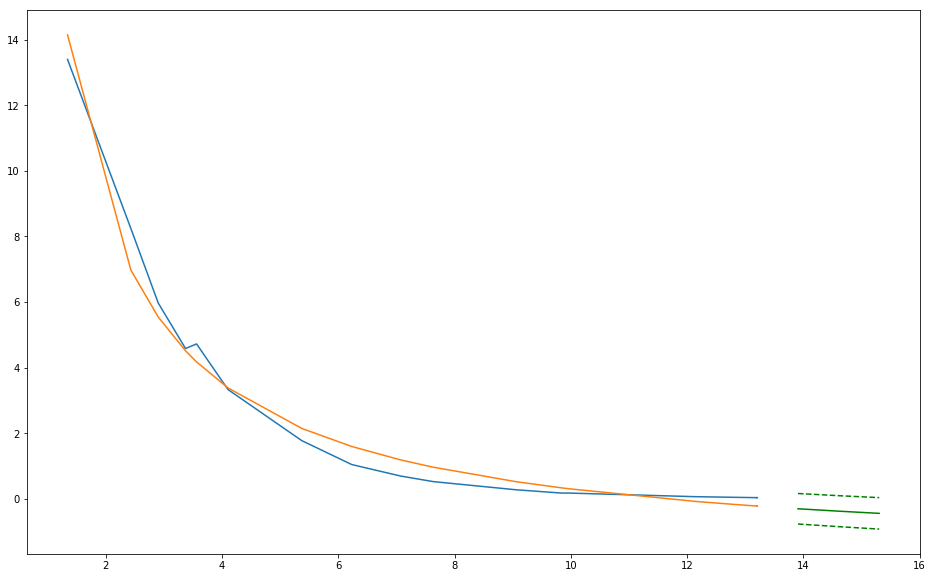

In [20]:
plt.plot(X_data, Y_data)
plt.plot(X_data, models[2][1])
plt.plot(x_next, y_next, "g")
plt.plot(x_next, y_next - delta_y, "--g")
plt.plot(x_next, y_next + delta_y, "--g")